In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def reduz_animais(ghs_observada, ghs_predita):
    if ghs_predita == 3:
        return False
    #elif ghs_observada == ghs_predita and ghs_observada != 3 and ghs_predita != 3:
    elif ghs_observada == ghs_predita and ghs_predita != 3:
        return True
    elif ghs_observada > 3 and ghs_predita < 3:
        return False
    elif ghs_observada < 3 and ghs_predita > 3:
        return False
    elif ghs_observada > 3 and ghs_observada > ghs_predita:
        return True
    elif ghs_observada < 3 and ghs_observada < ghs_predita:
        return True
    else:
        return False

***

# MOUSE VI

In [3]:
mouse_vi = pd.read_excel('validacao_mouse_vi.xlsx')
mouse_vi['reduz_animais'] = mouse_vi.apply(lambda row: reduz_animais(row['ghs_observada'], row['ghs_predita']), axis=1)
mouse_vi.to_excel('validacao_mouse_vi_nova_predicao.xlsx', index=False)

print(f'Predição da classe correta: {(mouse_vi['mesma_classe'].sum() * 100) / mouse_vi.shape[0]}')
print(f'Redução de animais: {(mouse_vi['reduz_animais'].sum() * 100) / mouse_vi.shape[0]}')

Predição da classe correta: 65.32338308457712
Redução de animais: 37.014925373134325


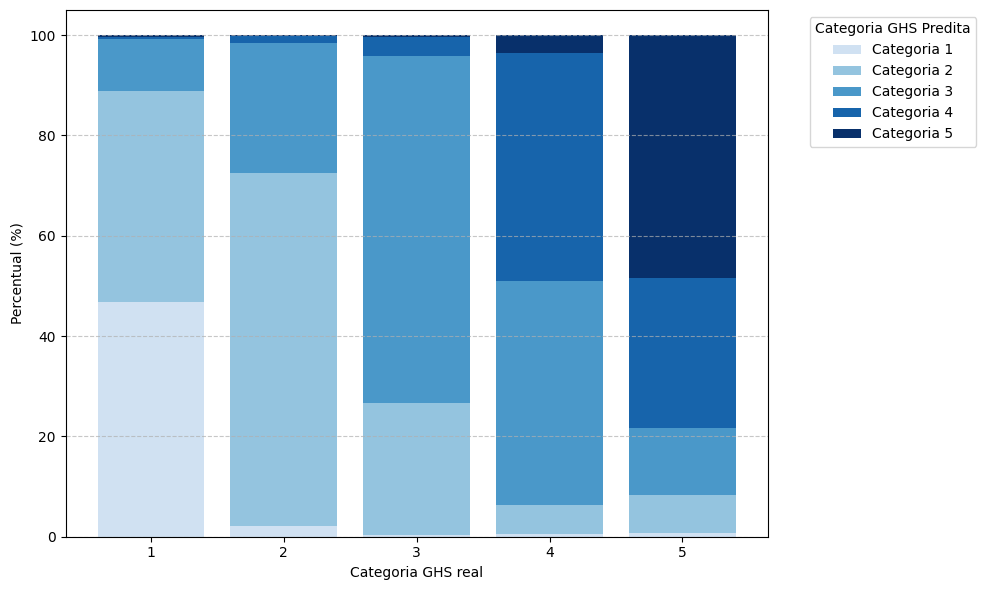

In [4]:
# Criar uma tabela de contingência (similar a uma matriz de confusão)
contingency_table = pd.crosstab(mouse_vi['ghs_observada'], mouse_vi['ghs_predita'])

# Normalizar para percentuais
contingency_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Definir uma paleta monocromática (tons de azul)
colors = plt.cm.Blues(np.linspace(0.2, 1, len(contingency_normalized.columns)))

# Criar o gráfico de barras empilhadas normalizadas
fig, ax = plt.subplots(figsize=(10, 6))

for i, classe_predita in enumerate(contingency_normalized.columns):
    ax.bar(
        contingency_normalized.index, 
        contingency_normalized[classe_predita], 
        label=f"Categoria {classe_predita}", 
        bottom=contingency_normalized.iloc[:, :i].sum(axis=1),
        color=colors[i]
    )

# Personalizações do gráfico
ax.set_xlabel("Categoria GHS real")
ax.set_ylabel("Percentual (%)")
ax.legend(title="Categoria GHS Predita", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(contingency_normalized.index)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [5]:
# Criar tabela de contingência
contingency_table = pd.crosstab(mouse_vi['ghs_observada'], mouse_vi['ghs_predita'])

# Normalizar para percentuais
contingency_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100


# Normalizar para percentuais
contingency_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Gerar relatório textual
relatorio = []
for classe_real in contingency_normalized.index:
    relatorio.append(f"Classe Real {classe_real}:")
    for classe_predita, percentual in contingency_normalized.loc[classe_real].items():
        relatorio.append(f"  - Predito como Classe {classe_predita}: {percentual:.2f}%")
    relatorio.append("")  # Linha em branco para separar as classes

# Imprimir o relatório no terminal
print("\n".join(relatorio))

# Opcional: salvar o relatório em um arquivo de texto
with open("relatorio_porcentagens.txt", "w") as f:
    f.write("\n".join(relatorio))

Classe Real 1:
  - Predito como Classe 1: 46.81%
  - Predito como Classe 2: 42.13%
  - Predito como Classe 3: 10.21%
  - Predito como Classe 4: 0.43%
  - Predito como Classe 5: 0.43%

Classe Real 2:
  - Predito como Classe 1: 2.22%
  - Predito como Classe 2: 70.23%
  - Predito como Classe 3: 25.95%
  - Predito como Classe 4: 1.46%
  - Predito como Classe 5: 0.14%

Classe Real 3:
  - Predito como Classe 1: 0.33%
  - Predito como Classe 2: 26.38%
  - Predito como Classe 3: 69.11%
  - Predito como Classe 4: 3.85%
  - Predito como Classe 5: 0.33%

Classe Real 4:
  - Predito como Classe 1: 0.52%
  - Predito como Classe 2: 5.76%
  - Predito como Classe 3: 44.76%
  - Predito como Classe 4: 45.29%
  - Predito como Classe 5: 3.66%

Classe Real 5:
  - Predito como Classe 1: 0.83%
  - Predito como Classe 2: 7.50%
  - Predito como Classe 3: 13.33%
  - Predito como Classe 4: 30.00%
  - Predito como Classe 5: 48.33%



***

# MOUSE VO

In [6]:
mouse_vo = pd.read_excel('validacao_mouse_vo.xlsx')
mouse_vo['reduz_animais'] = mouse_vi.apply(lambda row: reduz_animais(row['ghs_observada'], row['ghs_predita']), axis=1)
mouse_vo.to_excel('validacao_mouse_vo_nova_predicao.xlsx', index=False)

print(f'Predição da classe correta: {(mouse_vo['mesma_classe'].sum() * 100) / mouse_vo.shape[0]}')
print(f'Redução de animais: {(mouse_vo['reduz_animais'].sum() * 100) / mouse_vo.shape[0]}')

Predição da classe correta: 67.4310216256525
Redução de animais: 27.74049217002237


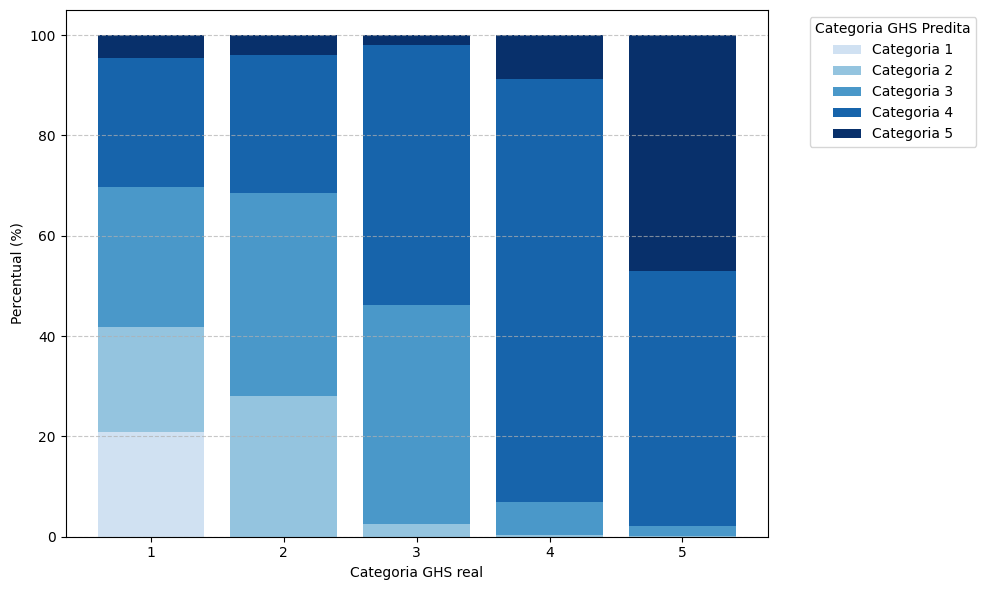

In [7]:
# Criar uma tabela de contingência (similar a uma matriz de confusão)
contingency_table = pd.crosstab(mouse_vo['ghs_observada'], mouse_vo['ghs_predita'])

# Normalizar para percentuais
contingency_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Definir uma paleta monocromática (tons de azul)
colors = plt.cm.Blues(np.linspace(0.2, 1, len(contingency_normalized.columns)))

# Criar o gráfico de barras empilhadas normalizadas
fig, ax = plt.subplots(figsize=(10, 6))

for i, classe_predita in enumerate(contingency_normalized.columns):
    ax.bar(
        contingency_normalized.index, 
        contingency_normalized[classe_predita], 
        label=f"Categoria {classe_predita}", 
        bottom=contingency_normalized.iloc[:, :i].sum(axis=1),
        color=colors[i]
    )

# Personalizações do gráfico
ax.set_xlabel("Categoria GHS real")
ax.set_ylabel("Percentual (%)")
ax.legend(title="Categoria GHS Predita", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(contingency_normalized.index)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [8]:
# Criar tabela de contingência
contingency_table = pd.crosstab(mouse_vo['ghs_observada'], mouse_vo['ghs_predita'])

# Normalizar para percentuais
contingency_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100


# Normalizar para percentuais
contingency_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Gerar relatório textual
relatorio = []
for classe_real in contingency_normalized.index:
    relatorio.append(f"Classe Real {classe_real}:")
    for classe_predita, percentual in contingency_normalized.loc[classe_real].items():
        relatorio.append(f"  - Predito como Classe {classe_predita}: {percentual:.2f}%")
    relatorio.append("")  # Linha em branco para separar as classes

# Imprimir o relatório no terminal
print("\n".join(relatorio))

# Opcional: salvar o relatório em um arquivo de texto
with open("relatorio_porcentagens.txt", "w") as f:
    f.write("\n".join(relatorio))

Classe Real 1:
  - Predito como Classe 1: 20.93%
  - Predito como Classe 2: 20.93%
  - Predito como Classe 3: 27.91%
  - Predito como Classe 4: 25.58%
  - Predito como Classe 5: 4.65%

Classe Real 2:
  - Predito como Classe 1: 0.00%
  - Predito como Classe 2: 28.00%
  - Predito como Classe 3: 40.57%
  - Predito como Classe 4: 27.43%
  - Predito como Classe 5: 4.00%

Classe Real 3:
  - Predito como Classe 1: 0.00%
  - Predito como Classe 2: 2.48%
  - Predito como Classe 3: 43.81%
  - Predito como Classe 4: 51.78%
  - Predito como Classe 5: 1.94%

Classe Real 4:
  - Predito como Classe 1: 0.03%
  - Predito como Classe 2: 0.32%
  - Predito como Classe 3: 6.59%
  - Predito como Classe 4: 84.24%
  - Predito como Classe 5: 8.82%

Classe Real 5:
  - Predito como Classe 1: 0.00%
  - Predito como Classe 2: 0.19%
  - Predito como Classe 3: 1.86%
  - Predito como Classe 4: 50.93%
  - Predito como Classe 5: 47.03%



***

# RAT VI

In [9]:
rat_vi = pd.read_excel('validacao_rat_vi.xlsx')
rat_vi['reduz_animais'] = rat_vi.apply(lambda row: reduz_animais(row['ghs_observada'], row['ghs_predita']), axis=1)
rat_vi.to_excel('validacao_rat_vi_nova_predicao.xlsx', index=False)

print(f'Predição da classe correta: {(rat_vi['mesma_classe'].sum() * 100) / rat_vi.shape[0]}')
print(f'Redução de animais: {(rat_vi['reduz_animais'].sum() * 100) / rat_vi.shape[0]}')

Predição da classe correta: 60.78740157480315
Redução de animais: 49.13385826771653


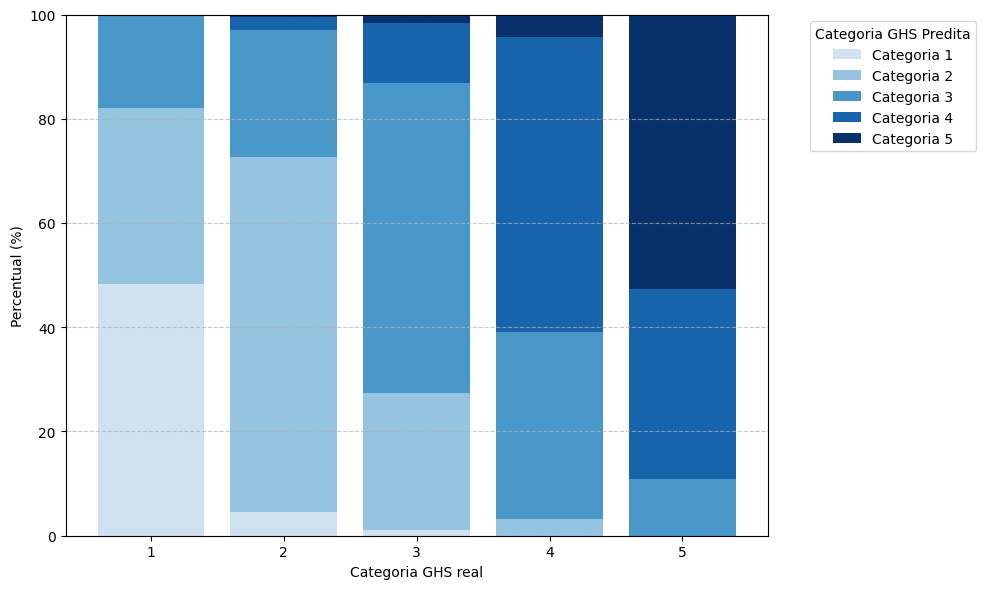

In [10]:
# Criar uma tabela de contingência (similar a uma matriz de confusão)
contingency_table = pd.crosstab(rat_vi['ghs_observada'], rat_vi['ghs_predita'])

# Normalizar para percentuais
contingency_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Definir uma paleta monocromática (tons de azul)
colors = plt.cm.Blues(np.linspace(0.2, 1, len(contingency_normalized.columns)))

# Criar o gráfico de barras empilhadas normalizadas
fig, ax = plt.subplots(figsize=(10, 6))

for i, classe_predita in enumerate(contingency_normalized.columns):
    ax.bar(
        contingency_normalized.index, 
        contingency_normalized[classe_predita], 
        label=f"Categoria {classe_predita}", 
        bottom=contingency_normalized.iloc[:, :i].sum(axis=1),
        color=colors[i]
    )

# Personalizações do gráfico
ax.set_xlabel("Categoria GHS real")
ax.set_ylabel("Percentual (%)")
ax.legend(title="Categoria GHS Predita", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(contingency_normalized.index)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [11]:
# Criar tabela de contingência
contingency_table = pd.crosstab(rat_vi['ghs_observada'], rat_vi['ghs_predita'])

# Normalizar para percentuais
contingency_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100


# Normalizar para percentuais
contingency_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Gerar relatório textual
relatorio = []
for classe_real in contingency_normalized.index:
    relatorio.append(f"Classe Real {classe_real}:")
    for classe_predita, percentual in contingency_normalized.loc[classe_real].items():
        relatorio.append(f"  - Predito como Classe {classe_predita}: {percentual:.2f}%")
    relatorio.append("")  # Linha em branco para separar as classes

# Imprimir o relatório no terminal
print("\n".join(relatorio))

# Opcional: salvar o relatório em um arquivo de texto
with open("relatorio_porcentagens.txt", "w") as f:
    f.write("\n".join(relatorio))

Classe Real 1:
  - Predito como Classe 1: 48.21%
  - Predito como Classe 2: 33.93%
  - Predito como Classe 3: 17.86%
  - Predito como Classe 4: 0.00%
  - Predito como Classe 5: 0.00%

Classe Real 2:
  - Predito como Classe 1: 4.55%
  - Predito como Classe 2: 68.18%
  - Predito como Classe 3: 24.38%
  - Predito como Classe 4: 2.48%
  - Predito como Classe 5: 0.41%

Classe Real 3:
  - Predito como Classe 1: 1.05%
  - Predito como Classe 2: 26.32%
  - Predito como Classe 3: 59.47%
  - Predito como Classe 4: 11.58%
  - Predito como Classe 5: 1.58%

Classe Real 4:
  - Predito como Classe 1: 0.00%
  - Predito como Classe 2: 3.26%
  - Predito como Classe 3: 35.87%
  - Predito como Classe 4: 56.52%
  - Predito como Classe 5: 4.35%

Classe Real 5:
  - Predito como Classe 1: 0.00%
  - Predito como Classe 2: 0.00%
  - Predito como Classe 3: 10.91%
  - Predito como Classe 4: 36.36%
  - Predito como Classe 5: 52.73%



***

# RAT VO

In [12]:
rat_vo = pd.read_excel('validacao_rat_vo.xlsx')
rat_vo['reduz_animais'] = rat_vo.apply(lambda row: reduz_animais(row['ghs_observada'], row['ghs_predita']), axis=1)
rat_vo.to_excel('validacao_rat_vo_nova_predicao.xlsx', index=False)

print(f'Predição da classe correta: {(rat_vo['mesma_classe'].sum() * 100) / rat_vo.shape[0]}')
print(f'Redução de animais: {(rat_vo['reduz_animais'].sum() * 100) / rat_vo.shape[0]}')

Predição da classe correta: 57.01010101010101
Redução de animais: 67.27272727272727


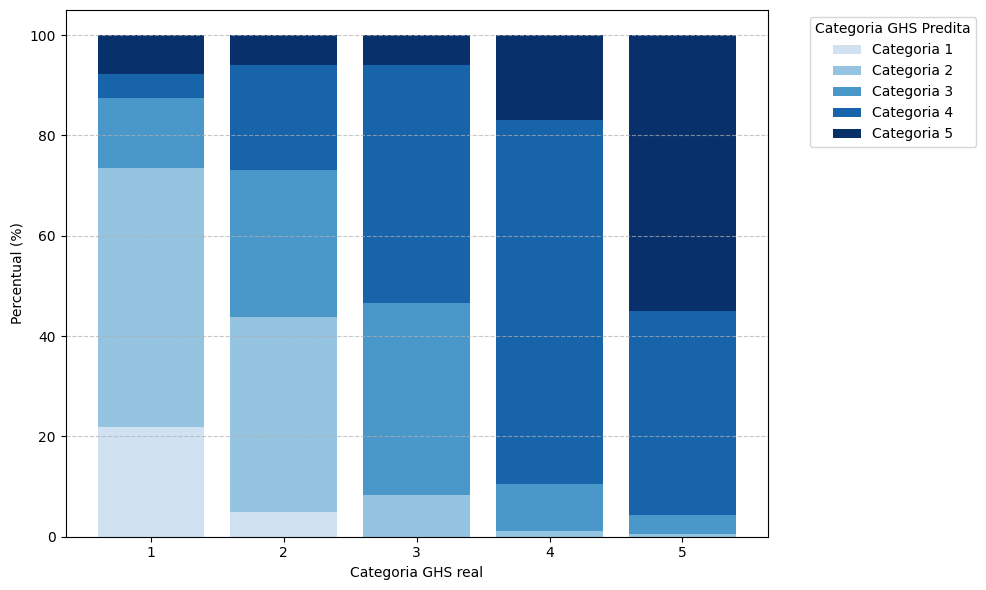

In [13]:
# Criar uma tabela de contingência (similar a uma matriz de confusão)
contingency_table = pd.crosstab(rat_vo['ghs_observada'], rat_vo['ghs_predita'])

# Normalizar para percentuais
contingency_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Definir uma paleta monocromática (tons de azul)
colors = plt.cm.Blues(np.linspace(0.2, 1, len(contingency_normalized.columns)))

# Criar o gráfico de barras empilhadas normalizadas
fig, ax = plt.subplots(figsize=(10, 6))

for i, classe_predita in enumerate(contingency_normalized.columns):
    ax.bar(
        contingency_normalized.index, 
        contingency_normalized[classe_predita], 
        label=f"Categoria {classe_predita}", 
        bottom=contingency_normalized.iloc[:, :i].sum(axis=1),
        color=colors[i]
    )

# Personalizações do gráfico
ax.set_xlabel("Categoria GHS real")
ax.set_ylabel("Percentual (%)")
ax.legend(title="Categoria GHS Predita", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(contingency_normalized.index)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
# Criar tabela de contingência
contingency_table = pd.crosstab(rat_vo['ghs_observada'], rat_vo['ghs_predita'])

# Normalizar para percentuais
contingency_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100


# Normalizar para percentuais
contingency_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Gerar relatório textual
relatorio = []
for classe_real in contingency_normalized.index:
    relatorio.append(f"Classe Real {classe_real}:")
    for classe_predita, percentual in contingency_normalized.loc[classe_real].items():
        relatorio.append(f"  - Predito como Classe {classe_predita}: {percentual:.2f}%")
    relatorio.append("")  # Linha em branco para separar as classes

# Imprimir o relatório no terminal
print("\n".join(relatorio))

# Opcional: salvar o relatório em um arquivo de texto
with open("relatorio_porcentagens.txt", "w") as f:
    f.write("\n".join(relatorio))

Classe Real 1:
  - Predito como Classe 1: 21.88%
  - Predito como Classe 2: 51.56%
  - Predito como Classe 3: 14.06%
  - Predito como Classe 4: 4.69%
  - Predito como Classe 5: 7.81%

Classe Real 2:
  - Predito como Classe 1: 4.98%
  - Predito como Classe 2: 38.81%
  - Predito como Classe 3: 29.35%
  - Predito como Classe 4: 20.90%
  - Predito como Classe 5: 5.97%

Classe Real 3:
  - Predito como Classe 1: 0.00%
  - Predito como Classe 2: 8.31%
  - Predito como Classe 3: 38.34%
  - Predito como Classe 4: 47.45%
  - Predito como Classe 5: 5.90%

Classe Real 4:
  - Predito como Classe 1: 0.00%
  - Predito como Classe 2: 1.06%
  - Predito como Classe 3: 9.43%
  - Predito como Classe 4: 72.56%
  - Predito como Classe 5: 16.95%

Classe Real 5:
  - Predito como Classe 1: 0.00%
  - Predito como Classe 2: 0.45%
  - Predito como Classe 3: 3.81%
  - Predito como Classe 4: 40.76%
  - Predito como Classe 5: 54.98%



***